In [3]:
### CALCULATING HYDROPHOBICITY

In [1]:
import pandas as pd

file_path = r"C:\Users\avani\Downloads\Protein_Comparison_Template.xlsx"
df = pd.read_excel(file_path)

hydropathy_index = {
    'A': 1.8,  'R': -4.5, 'N': -3.5, 'D': -3.5, 'C': 2.5,
    'Q': -3.5, 'E': -3.5, 'G': -0.4, 'H': -3.2, 'I': 4.5,
    'L': 3.8,  'K': -3.9, 'M': 1.9,  'F': 2.8,  'P': -1.6,
    'S': -0.8, 'T': -0.7, 'W': -0.9, 'Y': -1.3, 'V': 4.2
}

def calculate_hydrophobicity(sequence):
    if not isinstance(sequence, str): return None
    scores = [hydropathy_index.get(aa, 0) for aa in sequence if aa in hydropathy_index]
    return sum(scores) / len(scores) if scores else None

df["Hydrophobicity Index"] = df["Amino Acid Sequence"].apply(calculate_hydrophobicity)

print(df[["Protein Name", "Function", "Hydrophobicity Index"]].head())

df.to_excel(r"C:\Users\avani\Downloads\Protein_Hydrophobicity_Output.xlsx", index=False)


  Protein Name              Function  Hydrophobicity Index
0         TP53  Transcription Factor             -0.756234
1       NF-κB1  Transcription Factor             -0.339360
2        STAT1  Transcription Factor             -0.522933
3        FOXP3  Transcription Factor             -0.353132
4          MYC  Transcription Factor             -0.764537


In [2]:
#####Protein Length – Distribution Analysis

Index(['Protein Name', 'Function', 'Species', 'UniProt ID',
       'Amino Acid Sequence', 'Length (aa)', 'Molecular Weight (Da)',
       'Hydrophobicity Index'],
      dtype='object')


C:\Users\avani\python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


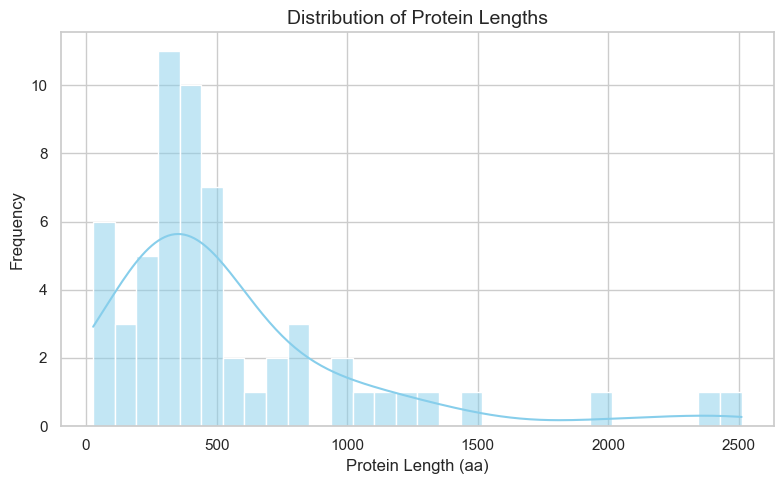


Summary Statistics for Protein Length:
count      60.000000
mean      562.133333
std       510.930672
min        27.000000
25%       284.500000
50%       414.500000
75%       699.750000
max      2511.000000
Name: Length (aa), dtype: float64


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\avani\Downloads\mini paper\Protein_Hydrophobicity_Output.xlsx"
df = pd.read_excel(file_path)

print(df.columns)

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.histplot(df["Length (aa)"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Protein Lengths", fontsize=14)
plt.xlabel("Protein Length (aa)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

summary = df["Length (aa)"].describe()
print("\nSummary Statistics for Protein Length:")
print(summary)


In [5]:
###Two-Way ANOVA with Interaction

Species: ['Human' 'E. coli']
Functions: ['Transcription Factor' 'Membrane Protein' 'Metabolic Enzyme']

Two-Way ANOVA Table:

                              sum_sq    df          F    PR(>F)
C(Function)             1.647491e+10   2.0   3.428595  0.039647
C(Species)              4.405620e+10   1.0  18.337076  0.000076
C(Function):C(Species)  2.034566e+09   2.0   0.423414  0.656963
Residual                1.297390e+11  54.0        NaN       NaN


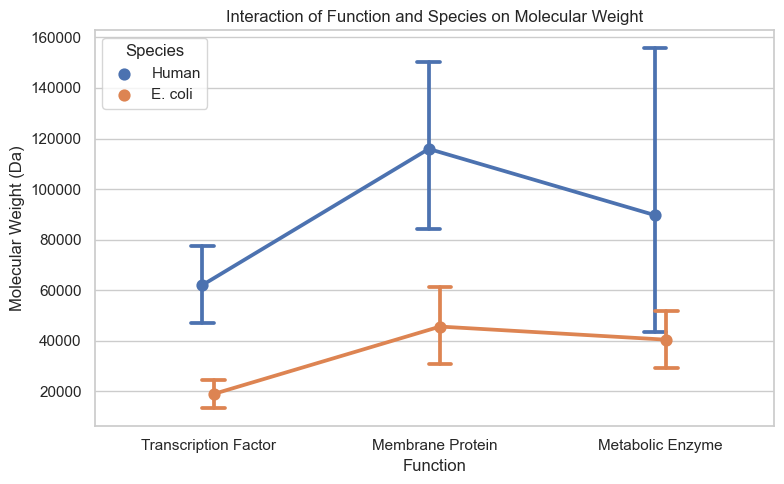

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

file_path = r"C:\Users\avani\Downloads\mini paper\Protein_Hydrophobicity_Output.xlsx"
df = pd.read_excel(file_path)

print("Species:", df["Species"].unique())
print("Functions:", df["Function"].unique())

model = ols('Q("Molecular Weight (Da)") ~ C(Function) + C(Species) + C(Function):C(Species)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nTwo-Way ANOVA Table:\n")
print(anova_table)

plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x="Function", y="Molecular Weight (Da)", hue="Species", dodge=True, capsize=.1)
plt.title("Interaction of Function and Species on Molecular Weight")
plt.tight_layout()
plt.show()


In [7]:
####Two-Way ANOVA (Hydrophobicity Index)


Two-Way ANOVA Results:
                          sum_sq    df          F    PR(>F)
C(Function)             1.996270   2.0  12.506230  0.000034
C(Species)              0.035498   1.0   0.444780  0.507664
C(Function):C(Species)  0.076676   2.0   0.480357  0.621180
Residual                4.309795  54.0        NaN       NaN


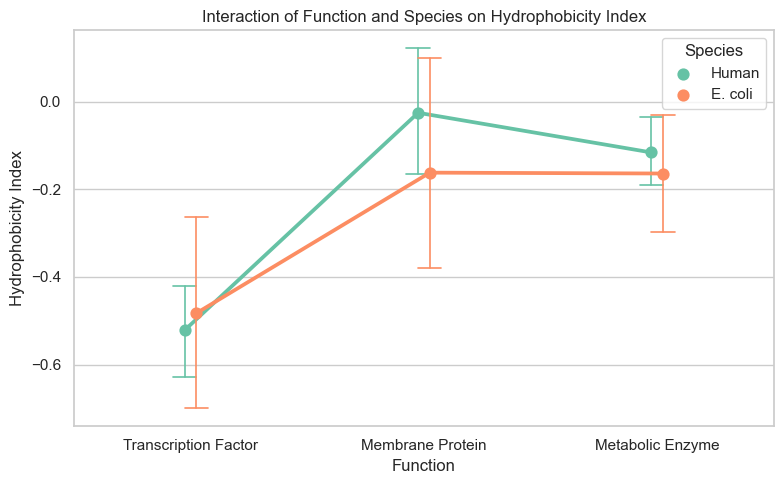

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

file_path = r"C:\Users\avani\Downloads\mini paper\Protein_Hydrophobicity_Output.xlsx"
df = pd.read_excel(file_path)

df = df.dropna(subset=["Hydrophobicity Index", "Function", "Species"])

model = ols('Q("Hydrophobicity Index") ~ C(Function) + C(Species) + C(Function):C(Species)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\nTwo-Way ANOVA Results:")
print(anova_table)

plt.figure(figsize=(8, 5))
sns.pointplot(data=df, x="Function", y="Hydrophobicity Index", hue="Species", 
              dodge=True, capsize=.1, errwidth=1.2, palette="Set2")
plt.title("Interaction of Function and Species on Hydrophobicity Index")
plt.ylabel("Hydrophobicity Index")
plt.tight_layout()
plt.show()


In [9]:
####clustering and mantel test

Computing pairwise sequence identities...


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:35<00:00,  1.70it/s]


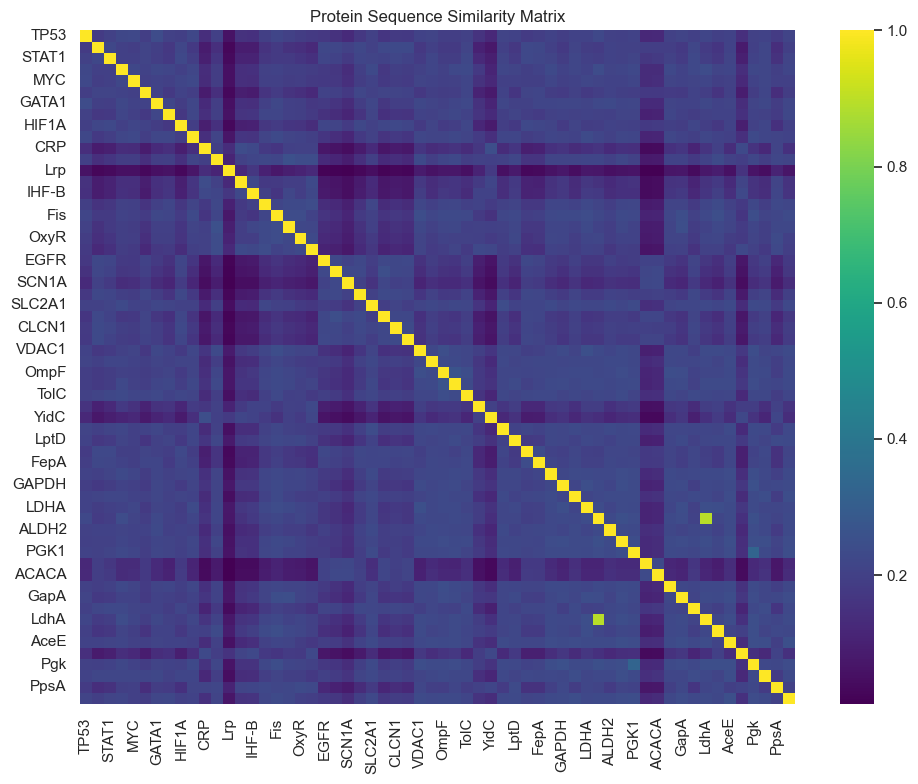

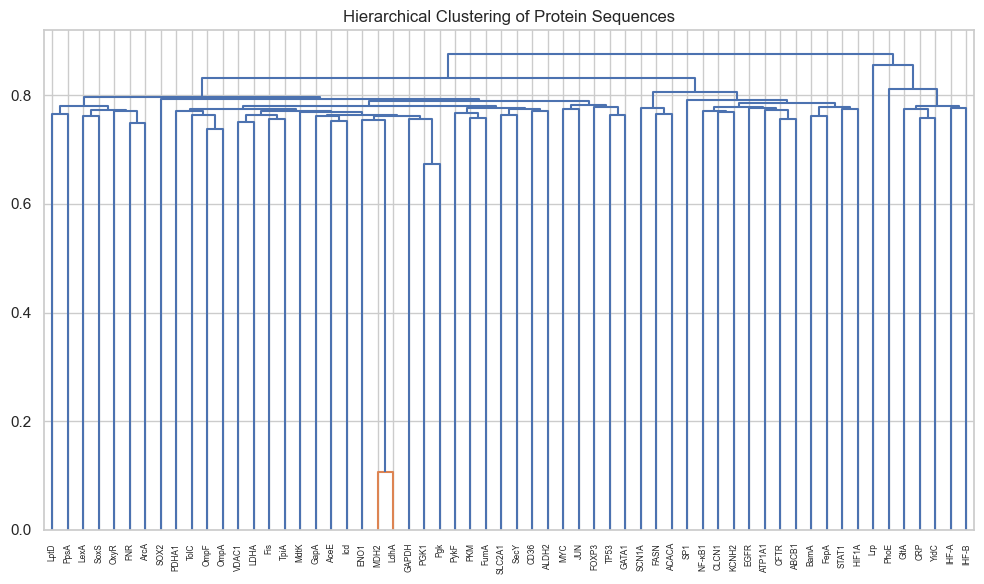


 Mantel Test (Manual Version)
Statistic (Pearson r) = 0.0702
P-value (permutation) = 0.0010


In [14]:
import pandas as pd
import numpy as np
from Bio import pairwise2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

file_path = r"C:\Users\avani\Downloads\mini paper\Protein_Hydrophobicity_Output.xlsx"
df = pd.read_excel(file_path)

df = df[["Protein Name", "Function", "Amino Acid Sequence"]].dropna()
df["Amino Acid Sequence"] = df["Amino Acid Sequence"].str.upper()

names = df["Protein Name"].tolist()
n = len(df)

sim_matrix = pd.DataFrame(np.zeros((n, n)), index=names, columns=names)

print("Computing pairwise sequence identities...")
for i in tqdm(range(n)):
    seq1 = df.iloc[i]["Amino Acid Sequence"]
    for j in range(i, n):
        seq2 = df.iloc[j]["Amino Acid Sequence"]
        if i == j:
            identity = 1.0
        else:
            alignments = pairwise2.align.globalxx(seq1, seq2, one_alignment_only=True)
            aln = alignments[0]
            matches = aln[2]
            aln_length = aln[4] - aln[3]
            identity = matches / aln_length
        sim_matrix.iloc[i, j] = identity
        sim_matrix.iloc[j, i] = identity

sim_matrix.to_csv("Protein_Similarity_Matrix.csv")

plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, cmap="viridis")
plt.title("Protein Sequence Similarity Matrix")
plt.tight_layout()
plt.show()

dist_matrix = 1 - sim_matrix  # convert similarity to distance
linked = linkage(squareform(dist_matrix), method='average')

plt.figure(figsize=(10, 6))
dendrogram(linked, labels=sim_matrix.index, leaf_rotation=90)
plt.title("Hierarchical Clustering of Protein Sequences")
plt.tight_layout()
plt.show()

func_labels = df.set_index("Protein Name").loc[sim_matrix.index]["Function"]
func_dist = pd.DataFrame(np.zeros_like(dist_matrix), index=sim_matrix.index, columns=sim_matrix.columns)

for i in sim_matrix.index:
    for j in sim_matrix.columns:
        func_dist.loc[i, j] = 0 if func_labels[i] == func_labels[j] else 1


def upper_tri_flat(matrix):
    return matrix.where(np.triu(np.ones(matrix.shape), k=1).astype(bool)).stack().values

seq_vals = upper_tri_flat(dist_matrix)
func_vals = upper_tri_flat(func_dist)

r_obs, _ = pearsonr(seq_vals, func_vals)

n_permutations = 999
perm_stats = []
for _ in range(n_permutations):
    shuffled = np.random.permutation(func_vals)
    r_perm, _ = pearsonr(seq_vals, shuffled)
    perm_stats.append(r_perm)

perm_stats = np.array(perm_stats)
p_value = np.sum(perm_stats >= r_obs) / n_permutations

print("\n Mantel Test (Manual Version)")
print(f"Statistic (Pearson r) = {r_obs:.4f}")
print(f"P-value (permutation) = {p_value:.4f}")


Pearson correlation by Function
Function: Membrane Protein | Pearson r = 0.9996, p = 0.0000
Function: Metabolic Enzyme | Pearson r = 0.9996, p = 0.0000
Function: Transcription Factor | Pearson r = 0.9978, p = 0.0000

Pearson correlation by Species
Species: E. coli | Pearson r = 0.9991, p = 0.0000
Species: Human | Pearson r = 0.9993, p = 0.0000


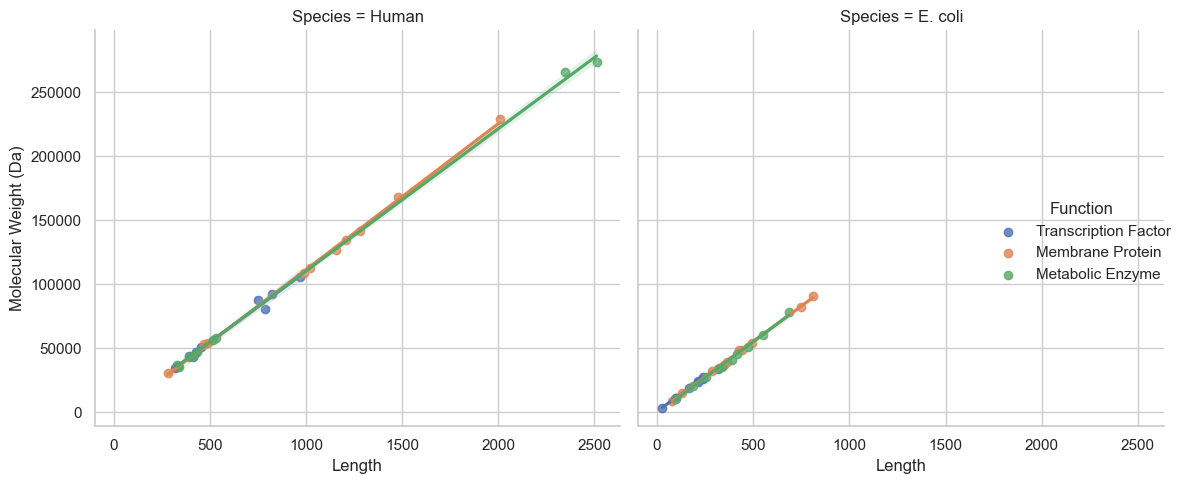

                                OLS Regression Results                                
Dep. Variable:     Q('Molecular Weight (Da)')   R-squared:                       0.999
Model:                                    OLS   Adj. R-squared:                  0.999
Method:                         Least Squares   F-statistic:                 1.304e+04
Date:                        Wed, 18 Jun 2025   Prob (F-statistic):           3.74e-81
Time:                                23:37:39   Log-Likelihood:                -536.10
No. Observations:                          60   AIC:                             1082.
Df Residuals:                              55   BIC:                             1093.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [16]:
#####pearson
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import statsmodels.formula.api as smf

file_path = r"C:\Users\avani\Downloads\mini paper\Protein_Hydrophobicity_Output.xlsx"
df = pd.read_excel(file_path)

df = df[["Protein Name", "Amino Acid Sequence", "Molecular Weight (Da)", "Function", "Species"]].dropna()
df["Length"] = df["Amino Acid Sequence"].apply(len)
df = df[df["Length"] > 0]

print("Pearson correlation by Function")
for func, group in df.groupby("Function"):
    r, p = pearsonr(group["Length"], group["Molecular Weight (Da)"])
    print(f"Function: {func} | Pearson r = {r:.4f}, p = {p:.4f}")

print("\nPearson correlation by Species")
for sp, group in df.groupby("Species"):
    r, p = pearsonr(group["Length"], group["Molecular Weight (Da)"])
    print(f"Species: {sp} | Pearson r = {r:.4f}, p = {p:.4f}")

sns.lmplot(data=df, x="Length", y="Molecular Weight (Da)", hue="Function", col="Species", height=5)
plt.tight_layout()
plt.show()

model = smf.ols("Q('Molecular Weight (Da)') ~ Length + C(Species) + C(Function)", data=df).fit()
print(model.summary())


In [17]:
###hydrophobicity index and weight

Pearson correlation by Function
Function: Membrane Protein | Pearson r = 0.0138, p = 0.9540
Function: Metabolic Enzyme | Pearson r = -0.0419, p = 0.8607
Function: Transcription Factor | Pearson r = 0.1970, p = 0.4051

Pearson correlation by Species within Function
Function: Membrane Protein | Species: E. coli | Pearson r = -0.3815, p = 0.2767
Function: Membrane Protein | Species: Human | Pearson r = -0.0427, p = 0.9068
Function: Metabolic Enzyme | Species: E. coli | Pearson r = -0.0148, p = 0.9677
Function: Metabolic Enzyme | Species: Human | Pearson r = -0.1964, p = 0.5866
Function: Transcription Factor | Species: E. coli | Pearson r = 0.8682, p = 0.0011
Function: Transcription Factor | Species: Human | Pearson r = 0.2738, p = 0.4440


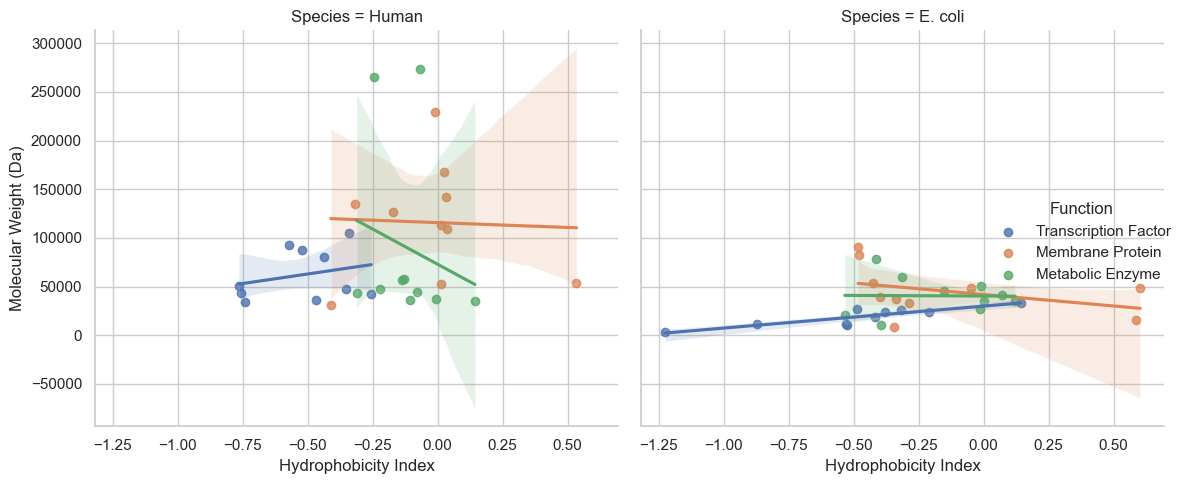

                                OLS Regression Results                                
Dep. Variable:     Q('Molecular Weight (Da)')   R-squared:                       0.315
Model:                                    OLS   Adj. R-squared:                  0.265
Method:                         Least Squares   F-statistic:                     6.323
Date:                        Wed, 18 Jun 2025   Prob (F-statistic):           0.000293
Time:                                23:39:07   Log-Likelihood:                -730.43
No. Observations:                          60   AIC:                             1471.
Df Residuals:                              55   BIC:                             1481.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.formula.api as smf

file_path = r"C:\Users\avani\Downloads\mini paper\Protein_Hydrophobicity_Output.xlsx"
df = pd.read_excel(file_path)

df = df[["Protein Name", "Hydrophobicity Index", "Molecular Weight (Da)", "Function", "Species"]].dropna()

print("Pearson correlation by Function")
for func, group in df.groupby("Function"):
    r, p = pearsonr(group["Hydrophobicity Index"], group["Molecular Weight (Da)"])
    print(f"Function: {func} | Pearson r = {r:.4f}, p = {p:.4f}")

print("\nPearson correlation by Species within Function")
for func, group_func in df.groupby("Function"):
    for sp, group_sp in group_func.groupby("Species"):
        r, p = pearsonr(group_sp["Hydrophobicity Index"], group_sp["Molecular Weight (Da)"])
        print(f"Function: {func} | Species: {sp} | Pearson r = {r:.4f}, p = {p:.4f}")

sns.lmplot(data=df, x="Hydrophobicity Index", y="Molecular Weight (Da)", hue="Function", col="Species", height=5)
plt.tight_layout()
plt.show()

model = smf.ols("Q('Molecular Weight (Da)') ~ Q('Hydrophobicity Index') + C(Function) + C(Species)", data=df).fit()
print(model.summary())


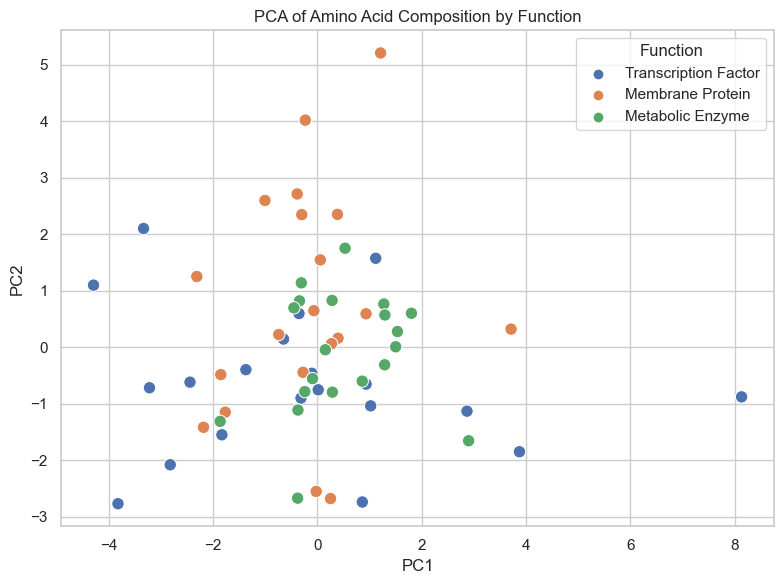

                       Multivariate linear model
                                                                        
------------------------------------------------------------------------
       Intercept           Value      Num DF  Den DF   F Value    Pr > F
------------------------------------------------------------------------
          Wilks' lambda       0.0000 20.0000 38.0000 5242221.9594 0.0000
         Pillai's trace       1.0000 20.0000 38.0000 5242221.9594 0.0000
 Hotelling-Lawley trace 2759064.1891 20.0000 38.0000 5242221.9594 0.0000
    Roy's greatest root 2759064.1891 20.0000 38.0000 5242221.9594 0.0000
------------------------------------------------------------------------
                                                                        
--------------------------------------------------------------------------
           Function          Value     Num DF    Den DF   F Value   Pr > F
-----------------------------------------------------------------------

In [19]:
###functions and sequence patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.multivariate.manova import MANOVA

file_path = r"C:\Users\avani\Downloads\mini paper\Protein_Hydrophobicity_Output.xlsx"
df = pd.read_excel(file_path)
df = df[["Protein Name", "Amino Acid Sequence", "Function"]].dropna()

amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

def compute_aa_composition(seq):
    seq = seq.upper()
    total = len(seq)
    comp = {aa: seq.count(aa) / total for aa in amino_acids}
    return pd.Series(comp)

aa_composition_df = df["Amino Acid Sequence"].apply(compute_aa_composition)
aa_composition_df["Function"] = df["Function"].values

X = aa_composition_df.drop("Function", axis=1)
X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["Function"] = aa_composition_df["Function"].values

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Function", s=80)
plt.title("PCA of Amino Acid Composition by Function")
plt.tight_layout()
plt.show()

aa_composition_df_for_manova = aa_composition_df.copy()
manova_input = "+".join(aa_composition_df_for_manova.columns.drop("Function"))
formula = f"{manova_input} ~ Function"
maov = MANOVA.from_formula(formula, data=aa_composition_df_for_manova)
print(maov.mv_test())
